In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
x=df.iloc[: , :-1]
y=df.iloc[: , -1]
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
(train_x,test_x,train_y,test_y)=train_test_split(x,y,test_size=0.25,random_state=0)
test_x

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [5]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(train_x,train_y)

SVC()

In [6]:
y_pred=classifier.predict(test_x)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(test_y,y_pred)
print(cm)
accuracy_score(test_y,y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

In [8]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=train_x,y=train_y,cv=10)
accuracies.mean()

0.9636363636363635

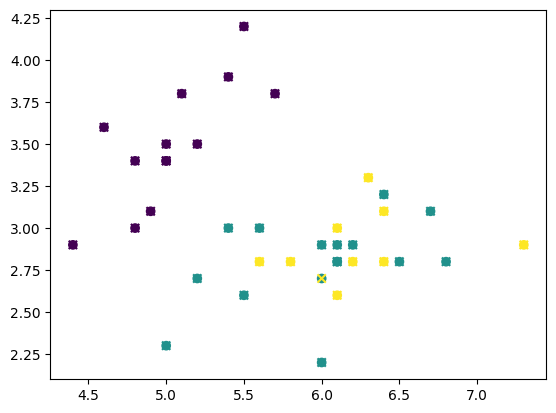

In [9]:
plt.scatter(test_x.iloc[:,0],test_x.iloc[:,1],c=test_y)
plt.scatter(test_x.iloc[:,0],test_x.iloc[:,1],c=y_pred,marker='x')
plt.show()